In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import datasets as ds

In [3]:
# load dataset
diabetes = ds.load_diabetes(as_frame=True) #
# print(type(diabetes['data']))

In [21]:
# assign diabetes features to X, an array of shape (442, 10)
# assign diabetes labels to y, an array of shape (442, )
X = diabetes['data']
y = diabetes['target']
print(list(diabetes))
print(diabetes['target'][:20])

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']
0     151.0
1      75.0
2     141.0
3     206.0
4     135.0
5      97.0
6     138.0
7      63.0
8     110.0
9     310.0
10    101.0
11     69.0
12    179.0
13    185.0
14    118.0
15    171.0
16    166.0
17    144.0
18     97.0
19    168.0
Name: target, dtype: float64


## plot data

In [10]:
# Don't plot the sex data

features = diabetes['feature_names']
features.remove('sex')

ValueError: list.remove(x): x not in list

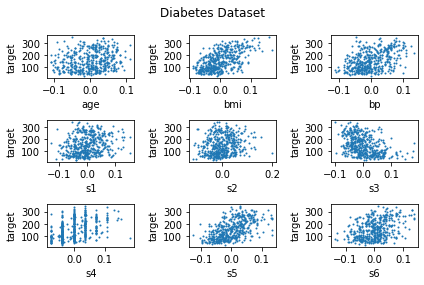

In [14]:
# plot
fig, axs = plt.subplots(3, 3)
fig.subtitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        idx = j + i * 3
        feature = features[idx]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1) # s means point size
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')

plt.tight_layout()
plt.show()

## ________________________________
## calculate elements in each class

In [23]:
import pandas as pd

data = pd.DataFrame(X, columns=features)
target = pd.DataFrame(y, columns=["target"])
# print(target[:20])

In [26]:
df = pd.merge(data, target, left_index=True, right_index=True)
df

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [36]:
y = df['target']
# y2 = df.target # same as last row
X = df.drop(['target'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1) # random state 设为一样的会有一样的数据划分，但是如果设为false即为随机划分
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((397, 9), (45, 9), (397,), (45,))

In [38]:
## Logistic Regression
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.5184545573135935


In [42]:
pred = model.predict(X_val)

err = mean_squared_error(y_val, pred, squared=True)

76.80425618373866

In [ ]:
plt.figure()
plt.xlabel('prediction')
plt.ylabel('label')
plt.scatter(pred, y_val, s=1)
plt.xscale('log')
plt.yscale('log')